<a href="https://colab.research.google.com/github/SandeepChudali2000/Diabetes_Data/blob/main/Diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Since the data is well manged and donot contain any missing data we go for Exploring data analysis(EDA)

#EDA

###Plot value counts of each cateogry on outcome feature.

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


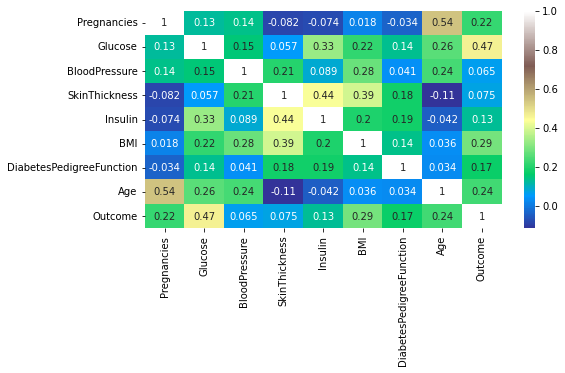

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(8,4)



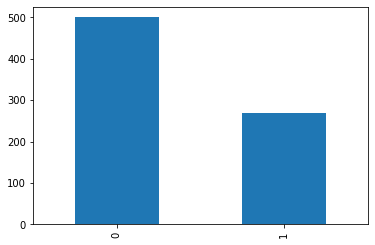

In [9]:
df.Outcome.value_counts().plot.bar()
plt.show()

* The people with diabetes is less than the people with diabetes.

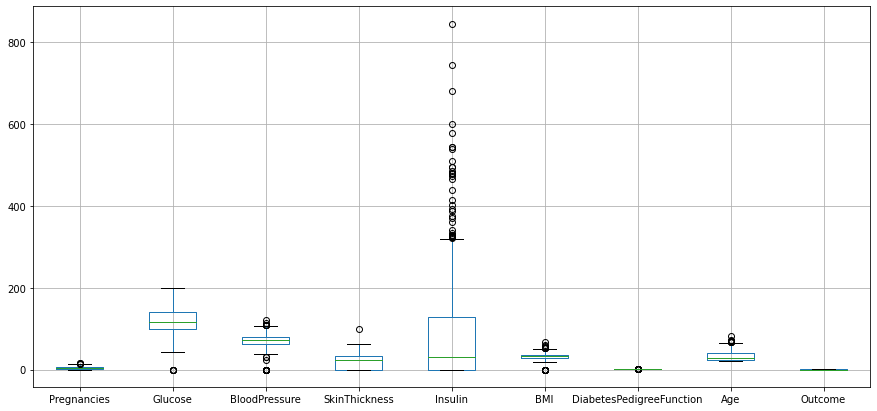

In [10]:
df.boxplot(figsize=(15,7))

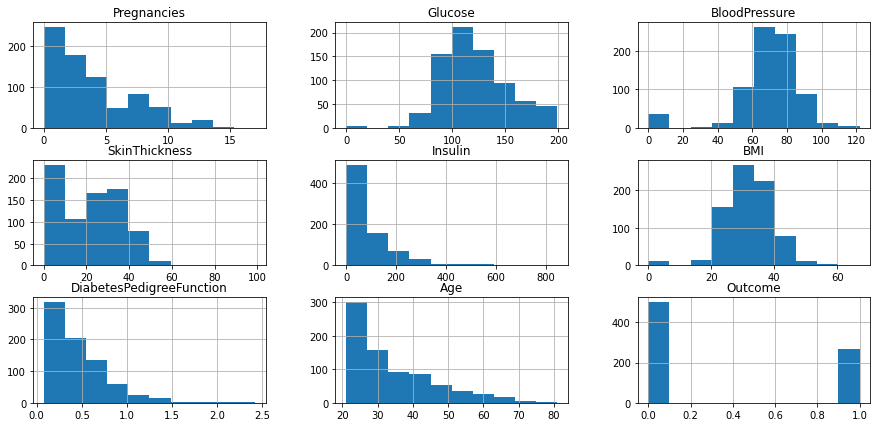

In [26]:
df.hist(figsize=(15,7))
plt.show()

# Train Test Split Data

In [30]:
X=df.drop('Outcome',axis=1)

In [31]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [32]:
y=df['Outcome']

In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [36]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [37]:
x_test.shape,y_train.shape

((154, 8), (614,))

# Modeling Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression(max_iter=1000)

In [45]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred=model.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [48]:
confusion_matrix(y_pred,y_test)

array([[86, 27],
       [ 9, 32]])

In [49]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [50]:
recall_score(y_test,y_pred)

0.5423728813559322

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



 # Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
Decision_Tree_Model=DecisionTreeClassifier()

In [55]:
Decision_Tree_Model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred=Decision_Tree_Model.predict(x_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        95
           1       0.70      0.64      0.67        59

    accuracy                           0.76       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
Random_Forest_Model=RandomForestClassifier()

In [61]:
Random_Forest_Model.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_pred=Random_Forest_Model.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        95
           1       0.74      0.49      0.59        59

    accuracy                           0.74       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.74      0.73       154



# Hyper parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[2,6,9],
    'max_features':['sqrt','log2'],
    'random_state':[10,20,30,40]
}

In [66]:
model=DecisionTreeClassifier()

In [67]:
cv=GridSearchCV(model,param_grid,cv=5)

In [69]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [10, 20, 30, 40]})

In [70]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=20)

In [71]:
best_model=cv.best_estimator_

In [72]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=20)

In [73]:
y_pred=best_model.predict(x_test)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        95
           1       0.82      0.54      0.65        59

    accuracy                           0.78       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.79      0.78      0.77       154

